In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle
import os
from tqdm import tqdm_notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
sns.set(style="whitegrid")

# this is hack, but who cares, use script as default folder
# otherwise the pickle doens't work
import sys
sys.path.insert(0, 'script')

import dataset as d
import models as m
import submission as s

### 1. Run
First run the whole dataset and without any optimization. 
The following Surpise models were used:


In [110]:
!ls run_1 | cat

SurpriseBaselineOnly.result
SurpriseCoClustering.result
SurpriseKNNBaseline.result
SurpriseKNNBasic.result
SurpriseKNNWithMeans.result
SurpriseNMF.result
SurpriseSlopeOneModel.result
SurpriseSvdModel.result
SurpriseSvdPPModel.result


#### Plot the result

In [14]:
def read_mse(folder):
    model_to_rmse = []
    for file in tqdm_notebook(os.listdir('run_1')):
        if '.result' not in file: continue
        data = pickle.load(open(folder + "/" + file, "rb" )) 
        r = list(map(lambda x: x[0].rmse, data))
        n = file.split('.')[0]
        model_to_rmse.append(dict(name=n, rmse=r))
    return model_to_rmse

In [17]:
def plot_rmse(model_to_rmse):
    plt.rcParams['figure.figsize'] = (15, 6)
    ax = sns.boxplot(y=list(map(lambda x: x['rmse'], model_to_rmse)),
                     x=list(map(lambda x: x['name'], model_to_rmse)))
    ax.set_xticklabels(labels=list(map(lambda x: x['name'], model_to_rmse)), rotation=90)
;

''

Based on the above graph. I picked the following files and submitted: 

In [5]:
data = pickle.load(open("run_1/SurpriseBaselineOnly.result", "rb" )) 
worst = max(data, key=lambda x: x[0].rmse)[0]
s.create_submission_file(model=worst.algo, output_file='run_1/prediction_SurpriseBaselineOnly.csv')

100%|██████████| 1176952/1176952 [00:02<00:00, 434825.48it/s]


### Submission 22513
<pre>
I took by accident the file with the highest rmse ( 1.2219954859775726 ) and subitted it. 
Crowdai rmse: 1.127

In [6]:
data = pickle.load(open("run_1/SurpriseBaselineOnly.result", "rb" )) 
best = min(data, key=lambda x: x[0].rmse)[0]
s.create_submission_file(model=best.algo, output_file='run_1/prediction_SurpriseBaselineOnly_min.csv')

100%|██████████| 1176952/1176952 [00:03<00:00, 384058.66it/s]


### Submission 22515
<pre>
Local rmse: 0.9956188453679479
Crowdai rmse: 1.127
File: run_1/prediction_SurpriseBaselineOnly_min.csv

=> Both file seem to be the exact same prediction

In [7]:
data = pickle.load(open("run_1/SurpriseSvdModel.result", "rb" )) 
best = min(data, key=lambda x: x[0].rmse)[0]
s.create_submission_file(model=best.algo, output_file='run_1/prediction_SurpriseSvdModel.csv')

100%|██████████| 1176952/1176952 [00:02<00:00, 444465.92it/s]


### Submission 22517
<pre>
Local rmse: 0.9975809950987204
Crowdai rmse: 1.127
File: run_1/prediction_SurpriseSvdModel.csv

=> also this model seems to give the same result

In [13]:
worst.algo

In [17]:
best.algo.reg_bi

0.02

In [29]:
def create_prediction(result, output):
    data = pickle.load(open(result, "rb" )) 
    best = min(data, key=lambda x: x[0].rmse)[0]
    predictions = s.create_submission_file(model=best.algo, output_file=output)
    return (best, predictions)

In [31]:
for f in os.listdir('run_1'):
    if '.result' not in f: continue
    a = create_prediction(result="run_1/" + f, 
                      output='run_1/abc.csv')
    df_a = pd.DataFrame.from_records(a[1], columns=['userId', 'movieId', 'rating'])
    print(f, bdf_a.rating.unique())

run_1/SurpriseNMF.result


100%|██████████| 1176952/1176952 [00:02<00:00, 400771.46it/s]


[3.83172996]
run_1/SurpriseKNNBasic.result


100%|██████████| 1176952/1176952 [00:03<00:00, 390834.65it/s]


[3.83172996]
run_1/SurpriseKNNWithMeans.result


100%|██████████| 1176952/1176952 [00:03<00:00, 380263.36it/s]


[3.83172996]
run_1/SurpriseSvdModel.result


100%|██████████| 1176952/1176952 [00:03<00:00, 377740.67it/s]


[3.83172996]
run_1/SurpriseBaselineOnly.result


100%|██████████| 1176952/1176952 [00:02<00:00, 395767.07it/s]


[3.83172996]
run_1/SurpriseSlopeOneModel.result


100%|██████████| 1176952/1176952 [00:03<00:00, 382959.55it/s]


[3.83172996]
run_1/SurpriseSvdPPModel.result


100%|██████████| 1176952/1176952 [00:03<00:00, 375953.34it/s]


[3.83172996]
run_1/SurpriseCoClustering.result


100%|██████████| 1176952/1176952 [00:03<00:00, 375761.18it/s]


[3.83172996]
run_1/SurpriseKNNBaseline.result


100%|██████████| 1176952/1176952 [00:03<00:00, 375735.38it/s]


[3.83172996]


In [34]:
a = create_prediction(result="script/result/SurpriseBaselineOnly.result", output='run_1/abc.csv')
df_a = pd.DataFrame.from_records(a[1], columns=['userId', 'movieId', 'rating'])

script/result/SurpriseBaselineOnly.result


100%|██████████| 1176952/1176952 [00:03<00:00, 381508.70it/s]


In [43]:
df_a.rating.unique()

array([3.83172996])

### Submission 22563
<pre>
It seems that the KFold split with scikit did not work correctly. 
I use the surprsie KFold now, which will resulted in the following file.

Local rmse: 0.9956040868392116
Remote rmse: 1.04

### Submission 22574
<pre>
Local rmse: 1.0019204375735304
    {'bsl_options': {'method': 'als', 'reg': 1}}
remote rmse: 1.04
this is the first run with gridsearch, with these parameters:
{'bsl_options': {'method': ['als', 'sgd'], 'reg': [1, 2]}}

## 2. Run

In [8]:
!ls run_2 | cat

SurpriseBaselineOnly.result
SurpriseCoClustering.result
SurpriseKNNBaseline.result
SurpriseKNNBasic.result
SurpriseKNNWithMeans.result
SurpriseNMF.result
SurpriseSlopeOneModel.result
SurpriseSvdModel.result
SurpriseSvdPPModel.result


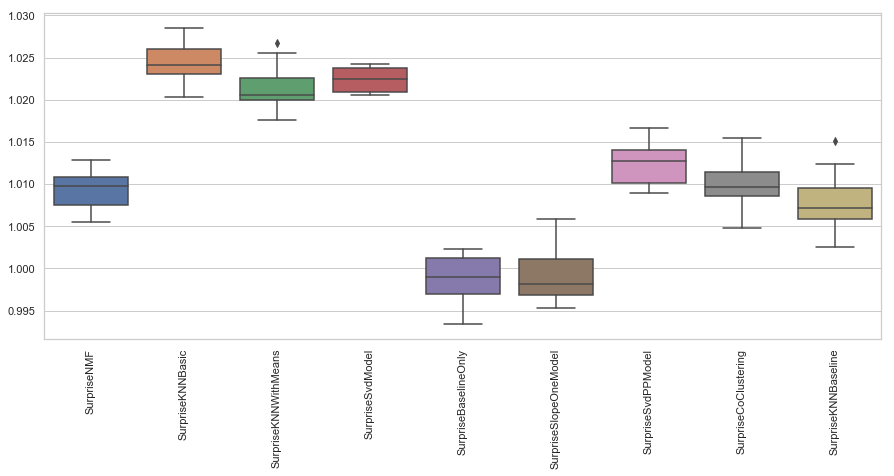

In [19]:
run_2 = read_mse('run_2')
plot_rmse(run_2)

### Run 3 (Grid Search)

In [113]:
gs = pickle.load(open('run_3_grid_search/GridSearch.result', 'rb'))

results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df['reg_u'] = results_df.params.apply(lambda x: x['bsl_options']['reg_u'])
results_df['reg_i'] = results_df.params.apply(lambda x: x['bsl_options']['reg_i'])
results_df['n_epochs'] = results_df.params.apply(lambda x: x['bsl_options']['n_epochs'])

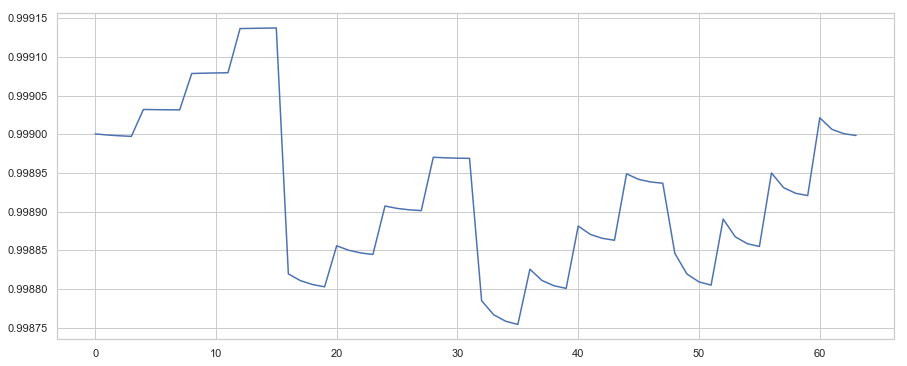

In [115]:
results_df.mean_test_rmse.plot.line();

In [106]:
results_df[['reg_u', 'reg_i', 'n_epochs', 'mean_test_rmse']]
results_df.mean_test_rmse.describe().to_frame()

,mean_test_rmse
count,64.000000
mean,0.998924
std,0.000104
min,0.998754
25%,0.998845
50%,0.998914
75%,0.998999
max,0.999137


The above results shows, that there is only a minor improvement!
Let's submit the best to see what rmse we get remotely.

In [119]:
data_input = d.to_surprise_read('data/data_surprise.csv')
algo = gs.best_estimator['rmse']
algo.fit(data_input.build_full_trainset())

Estimating biases using als...


In [125]:
x = s.create_submission_file(algo, output_file='run_3_grid_search/submission.csv')

100%|██████████| 1176952/1176952 [00:02<00:00, 420591.45it/s]


#### Submission 22695
<pre>
{'bsl_options': {
    'method': ['als'],
    'reg_i': [5, 10, 15, 20],
    'reg_u': [5, 10, 15, 20],
    'n_epochs': [5, 10, 15, 20]
}}

local rmse: 0.9987539286509693
remote rmse: 1.04